# XOHW21 - Fake News Detection

# Possible Algorithms to use in the Fake News Detection Task

# Naive Bayes Classifier
Models taken from https://scikit-learn.org/stable/modules/naive_bayes.html

## Fake News Detection using (MNB) with simple fake news dataset

The following algorithm creates a Multinomial Naive Bayes model in order to test it with the "news" fake news dataset, 
the original algorithm uses a Passive Agressive Classifier which can be found here: https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/ and also in the Basic-Fake-News-Detector notebook.

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import os

In [2]:
print(os.getcwd())

C:\Users\User\Documents\Python_Scripts\Fake-News-Detection\models


In [4]:
#Read the data
df=pd.read_csv('../news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(5068,) (5068,) (1267,) (1267,)


In [8]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [9]:
#DataFlair - Initialize a PassiveAggressiveClassifier
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=mnb.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.06%


MNB has an accuracy of 84.06% compared to the Passive Aggresive Classifier with an accuracy of 92.82%.

In [10]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[450, 188],
       [ 14, 615]], dtype=int64)

In [11]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1267 points : 202


## Fake News Detection using (MNB) with ISOT Fake News Dataset

The Fake News Dataset can be found here: https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import os
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import sys

In [2]:
print(os.getcwd())

C:\Users\User\Documents\Python_Scripts\Fake-News-Detection\models


In [3]:
!dir 

 Volume in drive C has no label.
 Volume Serial Number is A638-DECC

 Directory of C:\Users\User\Documents\Python_Scripts\Fake-News-Detection\models

17/05/2021  02:57 a.ÿm.    <DIR>          .
17/05/2021  02:57 a.ÿm.    <DIR>          ..
28/04/2021  09:39 p.ÿm.    <DIR>          .ipynb_checkpoints
29/04/2021  09:11 p.ÿm.            32.849 Annotations.ipynb
17/05/2021  02:56 a.ÿm.               290 best_models_isot.csv
28/04/2021  09:57 p.ÿm.             3.109 CommonOperations.ipynb
29/04/2021  02:09 a.ÿm.             6.442 hyperparametertuning_logs.txt
17/05/2021  02:45 a.ÿm.           376.347 LogisticRegression-FakeNewsDetection.ipynb
17/05/2021  02:57 a.ÿm.           145.088 MLPClassifier-FakeNewsDetection.ipynb
29/04/2021  04:02 a.ÿm.           331.674 MultinomialNB-FakeNewsDetection.ipynb
29/04/2021  03:56 a.ÿm.           332.391 PassiveAgressive-FakeNewsDetection.ipynb
16/04/2021  02:08 a.ÿm.           142.800 SVM-FakeNewsDetection.ipynb
               9 File(s)      1.370.990 by

In [4]:
#Load the respective data
df_fake=pd.read_csv('../isot_dataset/Fake.csv')
df_true=pd.read_csv('../isot_dataset/True.csv')

In [5]:
# Check true data
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Check true data info
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
# Check true data for missing values
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
# Check fake data
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
# Check fake data info
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
# Check fake data for missing values
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Data Preprocessing

In [11]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1

# Check data
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
# add a target class column to indicate whether the news is real or fake
df_fake['isfake'] = 0

# Check data
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)

In [14]:
# Check data
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
# Check data
df.tail()

,title,text,subject,date,isfake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [16]:
# Drop column
df.drop(columns = ['date'], inplace = True)

In [17]:
# Combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [18]:
# Check data sample
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [19]:
#DataFlair - Get the labels
labels=df.isfake
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: isfake, dtype: int64

In [20]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['original'], labels, test_size=0.2, random_state=7)

In [21]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(35918,) (35918,) (8980,) (8980,)


## Validation Set Creation (For hold-out validation)

In [22]:
#DataFlair - Split the dataset intro Training set and Validation set
x_train ,x_val ,y_train ,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=7)

In [23]:
print(x_train.shape, y_train.shape,x_val.shape, y_val.shape)

(28734,) (28734,) (7184,) (7184,)


In [24]:
%%time
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_val=tfidf_vectorizer.transform(x_val)

Wall time: 8.52 s


In [25]:
%%time
#DataFlair - Initialize a Multinomial Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)

#DataFlair - Predict on the validation set and calculate accuracy
y_pred_val=clf.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.53%
Wall time: 36 ms


In [26]:
#Comparing the score method from the same classifier and the accuracy score method from sklearn metrics.
print(clf.score(tfidf_val, y_val))
print(accuracy_score(y_val, y_pred_val))

0.9352728285077951
0.9352728285077951


In [27]:
#DataFlair - Build confusion matrix
confusion_matrix(y_val,y_pred_val, labels=[0,1])

array([[3600,  203],
       [ 262, 3119]], dtype=int64)

In [28]:
print("Number of mislabeled points out of a total %d points : %d" % (x_val.shape[0], (y_val != y_pred_val).sum()))

Number of mislabeled points out of a total 7184 points : 465


In [29]:
class_names = np.array([0, 1],dtype=object) #Classes as seen in the Dataset: 0 means Fake News, 1 means Real News.
print(class_names)

[0 1]


In [30]:
real_labels = ["Fake", "Real"]
real_labels

['Fake', 'Real']

Confusion matrix, without normalization
[[3600  203]
 [ 262 3119]]
Normalized confusion matrix
[[0.94662109 0.05337891]
 [0.07749187 0.92250813]]


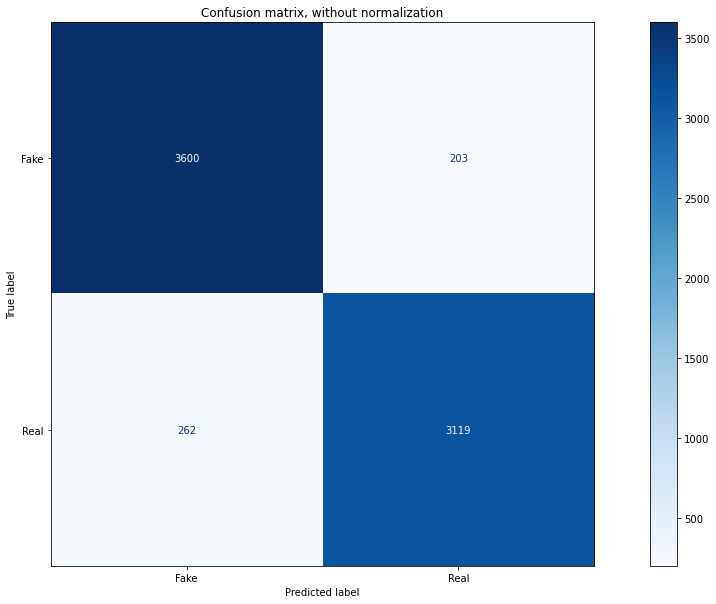

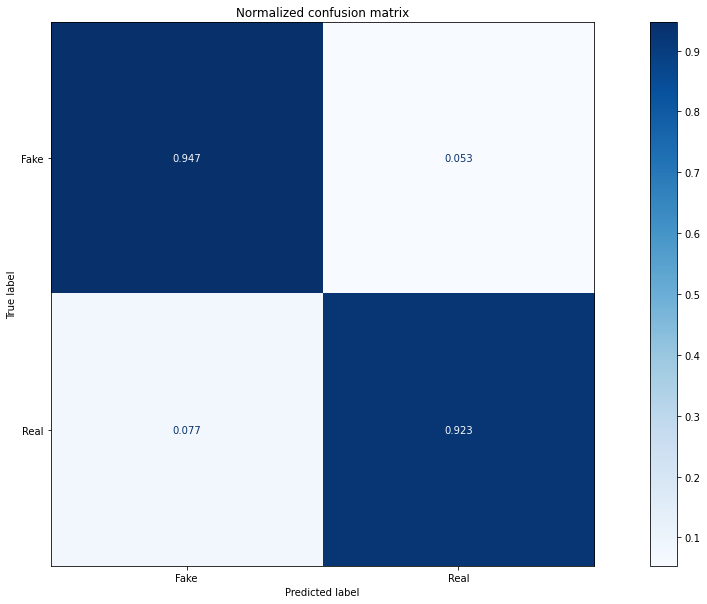

In [31]:
# Plot confusion matrix 
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(clf, tfidf_val, y_val,
                                 labels=class_names, #labels as seen in the Dataset; 0: Fake News, 1: Real News
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(real_labels)
    disp.ax_.set_yticklabels(real_labels)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [32]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [34]:
tfidf_test = tfidf_vectorizer.transform(x_test)
y_pred_test=clf.predict(tfidf_test)
test_score=accuracy_score(y_test,y_pred_test)
print(f'Accuracy: {round(test_score*100,2)}%')

Accuracy: 93.7%


## Saving the best model to the respective CSV Dataset file
For our study, we considered reporting baseline models without parameter tuning in order to compare it later with the respective tuned models, in this case, we have a default model from sklearn trained on the dataset, we held out a validation set and performed tests on validation and test set. Then we use our custom library to report results to a CSV file for the specific dataset.

In [136]:
#Import our custom library to write in a CSV the best model for the given dataset.
from ipynb.fs.full.CommonOperations import readcsv, writecsv

In [137]:
#Get the name of the model to include it in the logs
model_name = type(clf).__name__
print(model_name)

MultinomialNB


In [100]:
#Parameters for writecsv
#csv_file, model_name, hyperparameterTuned, validation_accuracy, test_accuracy
#We write 'No' since we haven't performed the Hyperparameter tuning on this model.
writecsv('best_models_isot.csv', model_name, 'No', score, test_score)  

In [101]:
#Show results and the new entry.
pd.read_csv("best_models_isot.csv")

,Model,Hyperparameter tuned,Validation Accuracy,Test Accuracy
0,MultinomialNB,No,0.9353,0.9370
1,PassiveAggressiveClassifier,No,0.9962,0.9939
2,PassiveAggressiveClassifier,Yes,0.9962,0.9949
3,LogisticRegression,No,0.9845,0.9859
4,PassiveAggressiveClassifier,Yes,0.9962,0.9949
5,MultinomialNB,No,0.9353,0.9511
6,LogisticRegression,No,0.9845,0.9859
7,LogisticRegression,No,0.9845,0.9859
8,LogisticRegression,Yes,0.9961,0.9944
9,PassiveAggressiveClassifier,No,0.9949,0.9939


## Hyperparameter tuning (Using hypopt and GridSearch)
The library can be found at: https://pypi.org/project/hypopt/

In [53]:
%%time
# Code from https://github.com/cgnorthcutt/hypopt
# Assuming you already have train, test, val sets and a model.

from hypopt import GridSearch

param_grid = [
  {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000, 100000, 1000000], 'fit_prior': [True, False]}
 ]

# Grid-search all parameter combinations using a validation set.
clf = MultinomialNB()
opt = GridSearch(model = clf, param_grid = param_grid, parallelize=False)
opt.fit(tfidf_train, y_train, tfidf_val, y_val)

#Transform X_test
tfidf_test = tfidf_vectorizer.transform(x_test)

print('Validation Score for Optimized Parameters:', opt.score(tfidf_val, y_val))
print('Test Score for Optimized Parameters:', opt.score(tfidf_test, y_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Validation Score for Optimized Parameters: 0.9116091314031181
Test Score for Optimized Parameters: 0.9145879732739421
Wall time: 3.21 s


In [59]:
opt.get_best_params() #This model doesn't match the accuracy with the one (that is better) found with the custom Hyperparameter tuning code. 

{'alpha': 0.0001, 'fit_prior': False}

## Hyperparameter Tuning (Using Custom Code)

In [35]:
%%time 
max_accuracy = -1
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000] #first test.
#alpha = np.arange(250, 1000.1, 50) Second test that will explore in depth the parameter found in the first test.
for option in alpha:
    
    #DataFlair - Initialize a Multinomial Naive Bayes Classifier
    clf = MultinomialNB(alpha=option, fit_prior= False)
    clf.fit(tfidf_train,y_train)

    #DataFlair - Predict on the validation set and calculate accuracy
    y_pred_val=clf.predict(tfidf_val)
    score=accuracy_score(y_val,y_pred_val)
    
    if score > max_accuracy:
        max_accuracy = score
        best_model = clf
    print("Option: ", option,',', f'Accuracy (rounded): {round(score*100,2)}%', ", Accuracy (detailed)", score)

print("Max accuracy: ", max_accuracy, " with best model: ", best_model)

Option:  1e-06 , Accuracy (rounded): 94.84% , Accuracy (detailed) 0.9483574610244989
Option:  1e-05 , Accuracy (rounded): 94.91% , Accuracy (detailed) 0.9490534521158129
Option:  0.0001 , Accuracy (rounded): 95.0% , Accuracy (detailed) 0.9500278396436526
Option:  0.001 , Accuracy (rounded): 94.79% , Accuracy (detailed) 0.9479398663697105
Option:  0.01 , Accuracy (rounded): 94.64% , Accuracy (detailed) 0.9464086859688196
Option:  0.1 , Accuracy (rounded): 94.11% , Accuracy (detailed) 0.941119153674833
Option:  1 , Accuracy (rounded): 93.57% , Accuracy (detailed) 0.9356904231625836
Option:  10 , Accuracy (rounded): 92.97% , Accuracy (detailed) 0.9297048997772829
Option:  100 , Accuracy (rounded): 92.65% , Accuracy (detailed) 0.9265033407572383
Option:  1000 , Accuracy (rounded): 92.18% , Accuracy (detailed) 0.9217706013363028
Option:  10000 , Accuracy (rounded): 91.31% , Accuracy (detailed) 0.9131403118040089
Option:  100000 , Accuracy (rounded): 91.16% , Accuracy (detailed) 0.9116091314

## Writing the Best model parameters to a log file

In [36]:
print(best_model)
best_model_dict = best_model.get_params()

MultinomialNB(alpha=0.0001, fit_prior=False)


In [37]:
#Get the name of the model to include it in the logs
model_name = type(best_model).__name__
print(model_name)

MultinomialNB


In [38]:
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

with open('hyperparametertuning_logs.txt', 'a') as f:
    print("Best model found at:",dt_string, file=f)
    print("%s Model with accuracy: %s , parameters: " % (model_name,max_accuracy) , file=f)
    print(best_model_dict, file=f)

## Model Prediction

In [39]:
#Use Saved Best Model from before and Predict on the test set and calculate accuracy.
tfidf_test = tfidf_vectorizer.transform(x_test)
y_pred_test=best_model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.11%


## Saving the best model to the respective CSV Dataset file
Again, we save the best model (in this case, the one found with the hyperparameter tuning) into a specific csv file for the dataset.

In [42]:
#Import our custom library to write in a CSV the best model for the given dataset.
from ipynb.fs.full.CommonOperations import readcsv, writecsv

In [43]:
#Parameters for writecsv
#csv_file, model_name, hyperparameterTuned, validation_accuracy, test_accuracy
#We write 'Yes' since this is the model that we used for hyperparameter tuning.
writecsv('best_models_isot.csv', model_name, 'Yes', max_accuracy, score)  

In [45]:
#Show results and the new entry.
pd.read_csv("best_models_isot.csv")

,Model,Hyperparameter tuned,Validation Accuracy,Test Accuracy
0,PassiveAggressiveClassifier,No,0.9962,0.9939
1,PassiveAggressiveClassifier,Yes,0.9962,0.9949
2,MultinomialNB,No,0.9353,0.9511
3,MultinomialNB,Yes,0.9500,0.9511
4,LogisticRegression,No,0.9944,0.9943
5,LogisticRegression,Yes,0.9961,0.9944
6,MLPClassifier,No,0.9930,0.9924


In [40]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred_test, labels=[0,1])

array([[4521,  154],
       [ 285, 4020]], dtype=int64)

Confusion matrix, without normalization
[[4521  154]
 [ 285 4020]]
Normalized confusion matrix
[[0.96705882 0.03294118]
 [0.06620209 0.93379791]]


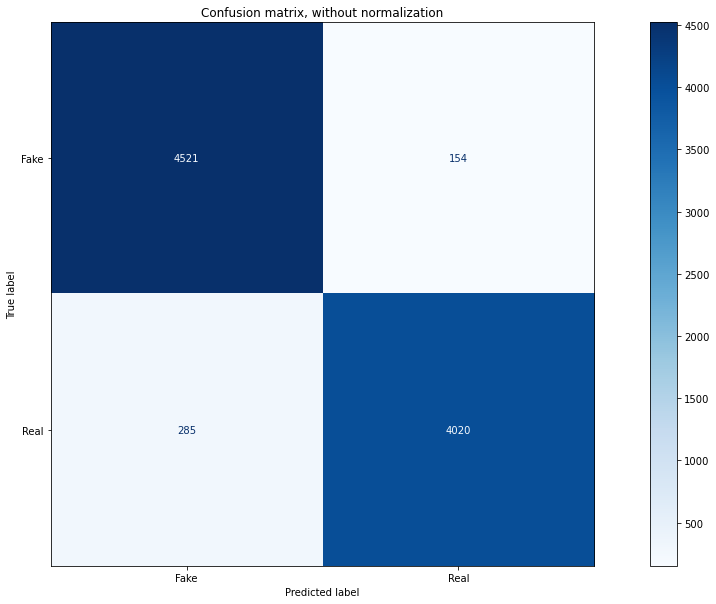

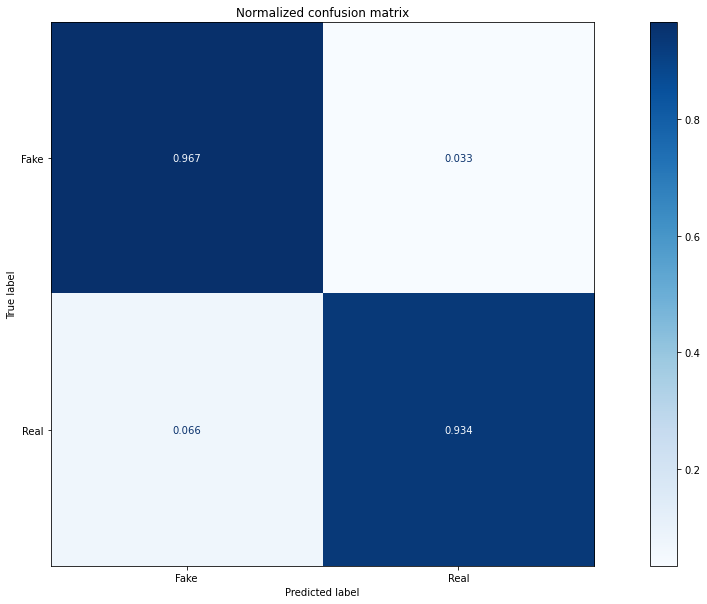

In [41]:
# Plot confusion matrix 
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(best_model, tfidf_test, y_test,
                                 labels=class_names, #labels as seen in the Dataset; 0: Fake News, 1: Real News
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(real_labels)
    disp.ax_.set_yticklabels(real_labels)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Fake News Detection using (MNB) with LIAR News Dataset

In [74]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import os
import matplotlib.pyplot as plt

In [75]:
#Load the respective data
header_names = ['ID','label','statement','subject','speaker','job title','state','party','hist_barely','hist_false','hist_half_true','hist_mostly_true','hist_pants_on_fire','location']
df_train=pd.read_csv('../liar_dataset/train.tsv',sep='\t',names=header_names)
df_val=pd.read_csv('../liar_dataset/valid.tsv',sep='\t', names=header_names)
df_test=pd.read_csv('../liar_dataset/test.tsv',sep='\t', names = header_names)

In [77]:
# Check true data
df_train.head()

,ID,label,statement,subject,speaker,job title,state,party,hist_barely,hist_false,hist_half_true,hist_mostly_true,hist_pants_on_fire,location
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [78]:
df_val.head()

,ID,label,statement,subject,speaker,job title,state,party,hist_barely,hist_false,hist_half_true,hist_mostly_true,hist_pants_on_fire,location
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [91]:
class_names = df_val['label'].unique()
class_names = np.array(['pants-fire', 'false','barely-true', 'half-true','mostly-true', 'true'],dtype=object)
class_names

array(['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true',
       'true'], dtype=object)

In [80]:
x_train = df_train['statement'].values
x_val = df_val['statement'].values
x_test = df_test['statement'].values

x_train

array(['Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.',
       'On lifting the U.S. Cuban embargo and allowing travel to Cuba.',
       "The Department of Veterans Affairs has a manual out there telling our veterans stuff like, 'Are you really of value to your community?' You know, encouraging them to commit suicide."],
      dtype=object)

In [81]:
y_train = df_train.label
y_val = df_val.label
y_test = df_test.label

In [ ]:
#One-hot encoding

label_train = pd.get_dummies(df_train.label)
label_val = pd.get_dummies(df_val.label)
label_test = pd.get_dummies(df_test.label)

y_train = label_train.to_numpy()
y_val = label_val.to_numpy()
y_test = label_test.to_numpy()

y_train.shape
y_train

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [82]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_val=tfidf_vectorizer.transform(x_val)

tfidf_train.shape

(10240, 11915)

In [83]:
#DataFlair - Initialize a Mulinomial Naive Nayes Classifier
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)

#DataFlair - Predict on the validation set and calculate accuracy
y_pred_val=mnb.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 23.05%


Confusion matrix, without normalization
[[  0  36  13  45  16   6]
 [  0  81  22 103  48   9]
 [  0  53  15 112  51   6]
 [  0  59  11 111  62   5]
 [  0  49   5 107  76  14]
 [  0  29   5  72  50  13]]
Normalized confusion matrix
[[0.         0.31034483 0.11206897 0.38793103 0.13793103 0.05172414]
 [0.         0.30798479 0.08365019 0.39163498 0.18250951 0.03422053]
 [0.         0.22362869 0.06329114 0.47257384 0.21518987 0.02531646]
 [0.         0.23790323 0.04435484 0.44758065 0.25       0.02016129]
 [0.         0.19521912 0.01992032 0.42629482 0.30278884 0.05577689]
 [0.         0.17159763 0.0295858  0.4260355  0.29585799 0.07692308]]


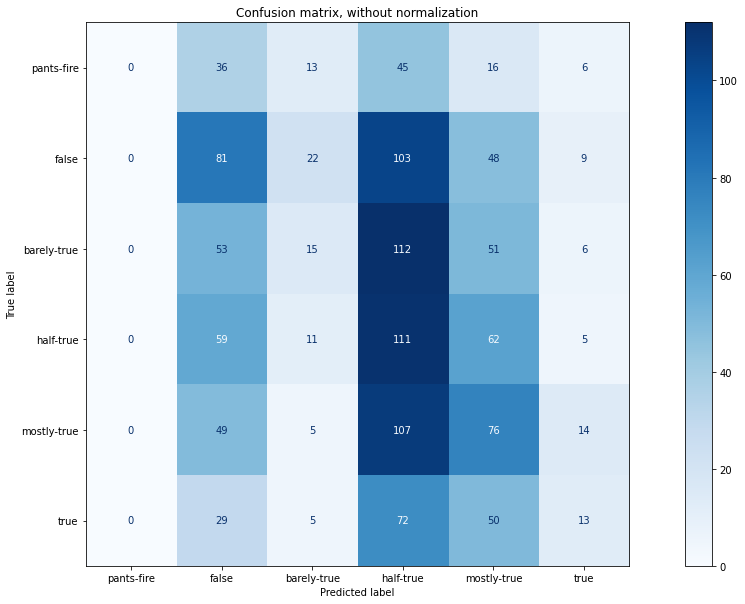

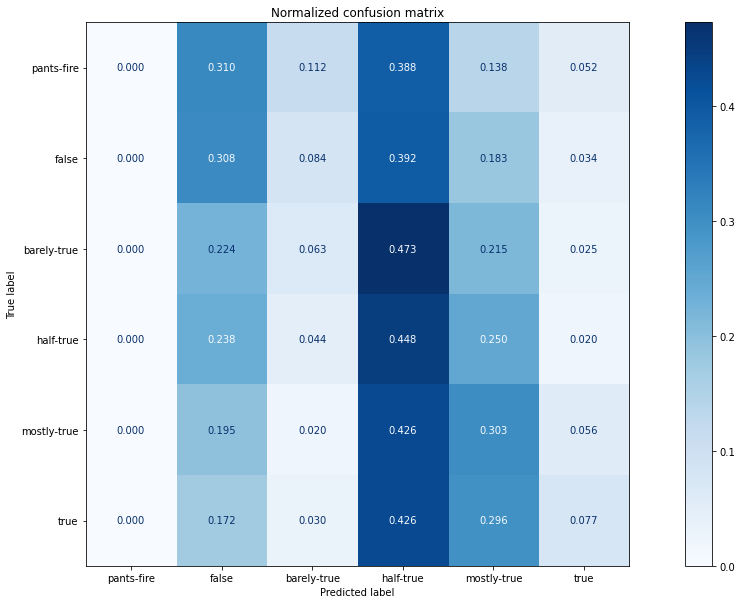

In [95]:
# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(mnb, tfidf_val, y_val,
                                 labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels([''] + class_names)
    disp.ax_.set_yticklabels([''] + class_names)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [85]:
tfidf_test = tfidf_vectorizer.transform(x_test)
y_pred_test=mnb.predict(tfidf_test)
score=accuracy_score(y_test,y_pred_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 23.76%


Confusion matrix, without normalization
[[  0  29   7  36  18   2]
 [  0  77  10  99  51  12]
 [  0  56  18  93  37   8]
 [  0  47  17 126  68   7]
 [  0  40   7 115  65  14]
 [  0  52   3  79  59  15]]
Normalized confusion matrix
[[0.         0.31521739 0.07608696 0.39130435 0.19565217 0.02173913]
 [0.         0.30923695 0.04016064 0.39759036 0.20481928 0.04819277]
 [0.         0.26415094 0.08490566 0.43867925 0.1745283  0.03773585]
 [0.         0.17735849 0.06415094 0.4754717  0.25660377 0.02641509]
 [0.         0.1659751  0.02904564 0.47717842 0.26970954 0.05809129]
 [0.         0.25       0.01442308 0.37980769 0.28365385 0.07211538]]


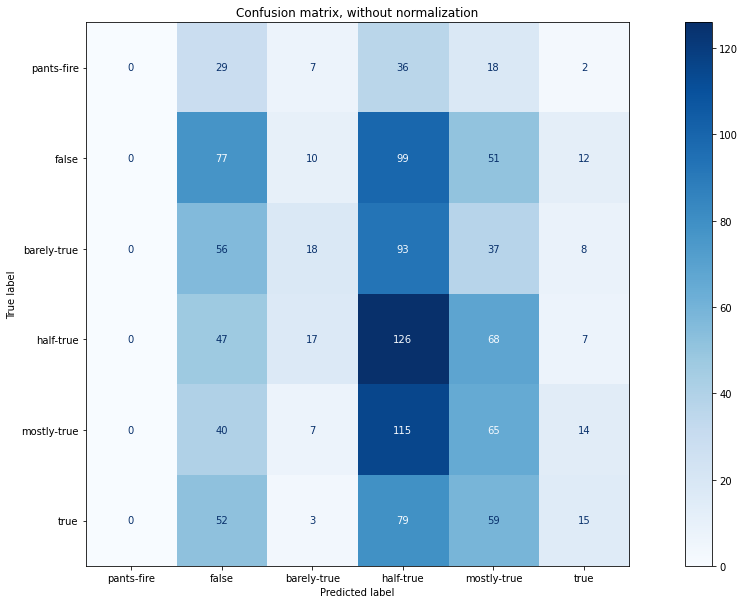

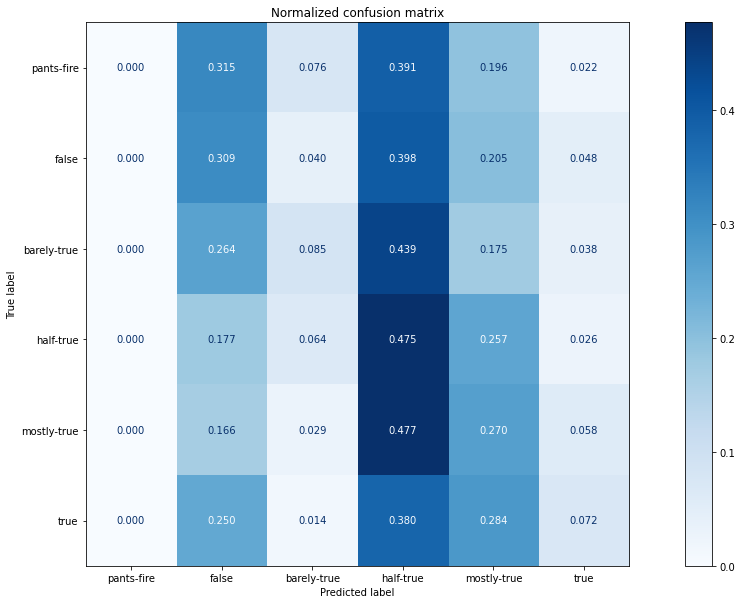

In [97]:
# Plot confusion matrix
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(mnb, tfidf_test, y_test,
                                 labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(class_names)
    disp.ax_.set_yticklabels(class_names)

    print(title)
    print(disp.confusion_matrix)

plt.show()